# MediaPipe

## Install

In [1]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 22.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

## Import

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import mediapipe as mp
import math

## Image

In [17]:
IMG = cv2.imread('/content/00003.png')

In [18]:
imgRGB = cv2.cvtColor(IMG, cv2.COLOR_BGR2RGB)

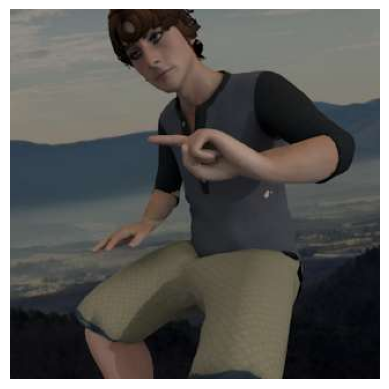

In [19]:
plt.axis('off')
plt.imshow(imgRGB)
plt.show()

## Work

In [20]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [21]:
DESIRED_HEIGHT = IMG.shape[0]
DESIRED_WIDTH = IMG.shape[1]
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

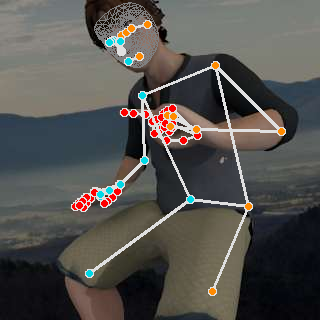

In [35]:
results = mp_holistic.Holistic().process(cv2.cvtColor(IMG, cv2.COLOR_BGR2RGB))
image_hight, image_width, _ = IMG.shape
annotated_image = IMG.copy()
mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
mp_drawing.draw_landmarks(
    annotated_image,
    results.face_landmarks,
    mp_holistic.FACEMESH_TESSELATION,
    landmark_drawing_spec=None,
    connection_drawing_spec=mp_drawing_styles
    .get_default_face_mesh_tesselation_style())
mp_drawing.draw_landmarks(
    annotated_image,
    results.pose_landmarks,
    mp_holistic.POSE_CONNECTIONS,
    landmark_drawing_spec=mp_drawing_styles.
    get_default_pose_landmarks_style())
resize_and_show(annotated_image)